<a href="https://colab.research.google.com/github/ChengxuanOuyang/PHAS0056-Machine-Learning/blob/main/CourseworkA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

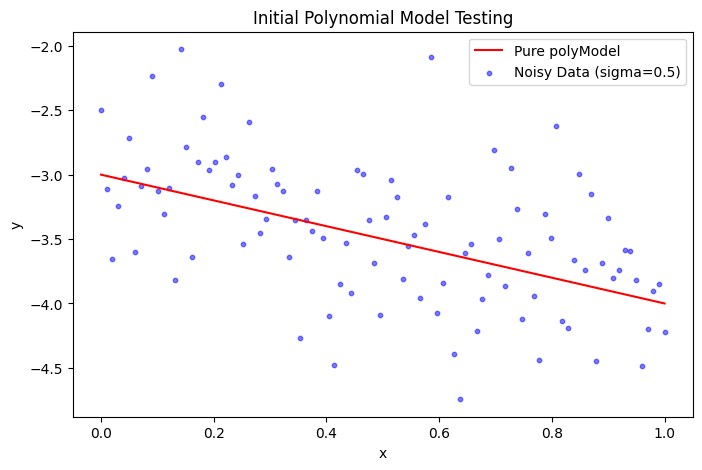

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# Part 1: Function Definition and Testing
# =============================================================================

def polyModel(x, theta):
    """
    Computes the polynomial y(x) = sum_{i} theta_i * x^i
    x: numpy array of input values
    theta: numpy array of parameters [theta_0, theta_1, ..., theta_n]
    """
    # Create a 2D array where each column is x raised to the power of i
    # This allows us to handle any length of theta using broadcasting
    powers = np.arange(len(theta))
    # x[:, None] reshapes x to (N, 1), powers[None, :] is (1, M)
    # Resulting x_pow is (N, M)
    x_pow = np.power(x[:, None], powers[None, :])

    # Perform the sum theta_i * x^i
    return np.dot(x_pow, theta)

def polyModelWithNoise(x, theta, sigma):
    """
    Computes the polynomial with added Gaussian noise
    sigma: standard deviation of the noise
    """
    y = polyModel(x, theta)
    noise = np.random.normal(0, sigma, size=x.shape)
    return y + noise

# Testing the functions
# Generate 100 x values evenly spaced between 0 and 1
x_test = np.linspace(0, 1, 100)
theta_true = np.array([-3.0, -1.0])
sigma = 0.5

# Generate model values and noisy data
y_pure = polyModel(x_test, theta_true)
y_noisy = polyModelWithNoise(x_test, theta_true, sigma)

# Plotting initial test
plt.figure(figsize=(8, 5))
plt.plot(x_test, y_pure, color='red', label='Pure polyModel')
plt.scatter(x_test, y_noisy, color='blue', s=10, alpha=0.5, label='Noisy Data (sigma=0.5)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Polynomial Model Testing')
plt.legend()
plt.show()

In [2]:
# =============================================================================
# Part 2: Gradient Descent
# =============================================================================

def polyGradient(x, theta):
    """
    Returns the gradient of the polynomial with respect to the parameters theta.
    The derivative of sum(theta_i * x^i) w.r.t theta_k is simply x^k.
    Returns a 2D array of shape (len(x), len(theta)).
    """
    powers = np.arange(len(theta))
    # Each column k in the returned matrix is x^k
    return np.power(x[:, None], powers[None, :])

# Stochastic Gradient Descent Implementation
theta_start = np.array([-1.0, 1.0]) # Starting values
theta_truth = np.array([-3.0, -1.0]) # Target values
eta = 0.5 # Learning rate
num_steps = 50
batch_size = 10

# Arrays to store progress for plotting
mse_history = np.zeros(num_steps)
theta_current = np.copy(theta_start)

for i in range(num_steps):
    # 1. Generate 10 random x values from uniform distribution [0, 1]
    x_batch = np.random.uniform(0, 1, batch_size)

    # 2. Generate noisy y target data using the true parameters
    y_target = polyModelWithNoise(x_batch, theta_truth, sigma=0.5)

    # 3. Calculate current model prediction
    y_pred = polyModel(x_batch, theta_current)

    # 4. Calculate Mean Squared Error (MSE) for this step
    error = y_pred - y_target
    mse = np.mean(error**2)
    mse_history[i] = mse

    # 5. Update theta using SGD algorithm
    # Gradient of MSE w.r.t theta is: (2/N) * sum((y_pred - y_target) * grad_f)
    # Following the simplified update rule from Week 1课件:
    grad_matrix = polyGradient(x_batch, theta_current)
    # We average the product of error and the basis functions x^k
    update = np.average(error[:, None] * grad_matrix, axis=0)
    theta_current -= eta * update

print(f"Final estimated theta: {theta_current}")

Final estimated theta: [-3.21671511 -0.89845069]


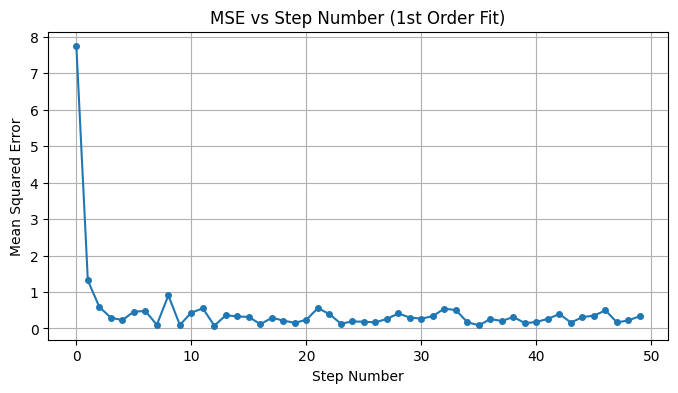

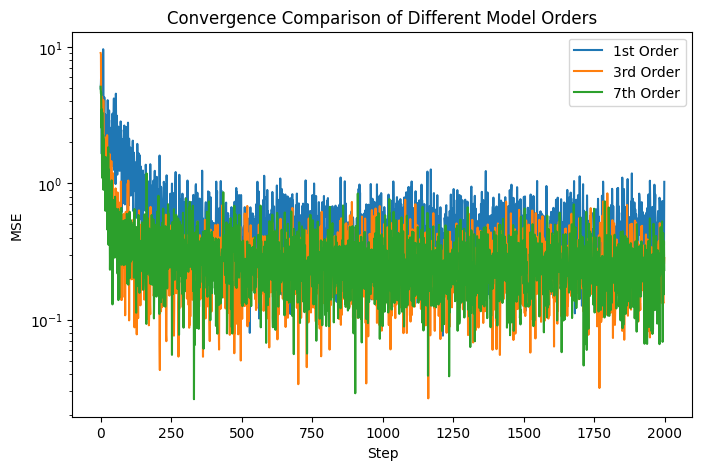

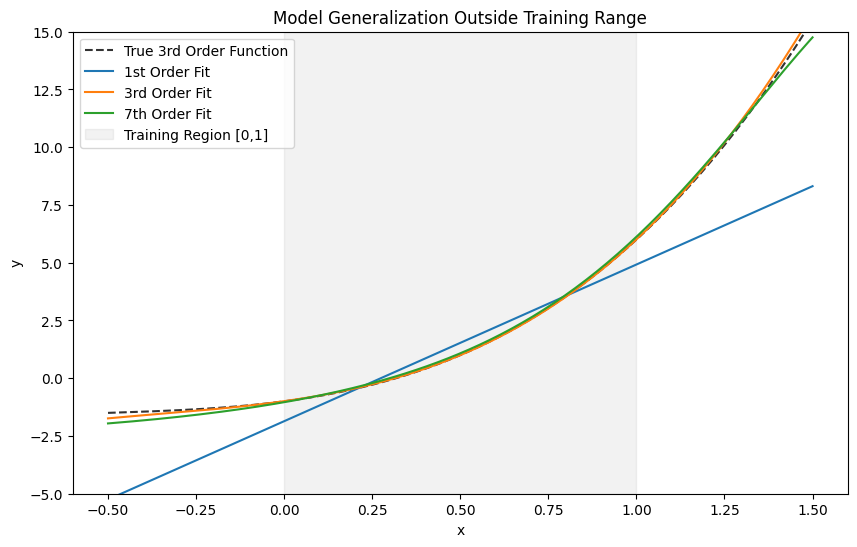

In [4]:
# =============================================================================
# Part 3: Results Plotting and Higher Order Polynomials
# =============================================================================

# Plot MSE vs Step Number for the first model
plt.figure(figsize=(8, 4))
plt.plot(np.arange(num_steps), mse_history, 'o-', markersize=4)
plt.xlabel('Step Number')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Step Number (1st Order Fit)')
plt.grid(True)
plt.show()

# Testing with 3rd Order Polynomial: theta = [-1, 2, 3, 2]
theta_3rd_truth = np.array([-1.0, 2.0, 3.0, 2.0])

def train_poly_fit(order, n_steps=2000, eta=0.1):
    """Helper function to fit polynomials of different orders"""
    theta_fit = np.zeros(order + 1)
    mse_log = np.zeros(n_steps)

    for i in range(n_steps):
        x_batch = np.random.uniform(0, 1, 10)
        # Generate target data from the TRUE 3rd order model
        y_target = polyModelWithNoise(x_batch, theta_3rd_truth, sigma=0.5)

        y_pred = polyModel(x_batch, theta_fit)
        error = y_pred - y_target
        mse_log[i] = np.mean(error**2)

        grad_matrix = polyGradient(x_batch, theta_fit)
        update = np.average(error[:, None] * grad_matrix, axis=0)
        theta_fit -= eta * update

    return theta_fit, mse_log

# Fit 1st, 3rd, and 7th order models
theta_fit1, mse1 = train_poly_fit(1)
theta_fit3, mse3 = train_poly_fit(3)
theta_fit7, mse7 = train_poly_fit(7)

# Plot MSE vs step for all three
plt.figure(figsize=(8, 5))
plt.plot(mse1, label='1st Order')
plt.plot(mse3, label='3rd Order')
plt.plot(mse7, label='7th Order')
plt.yscale('log') # Log scale helps see convergence
plt.xlabel('Step')
plt.ylabel('MSE')
plt.legend()
plt.title('Convergence Comparison of Different Model Orders')
plt.show()

# Generalization Plot: x-range from -0.5 to 1.5
x_wide = np.linspace(-0.5, 1.5, 200)
y_true_wide = polyModel(x_wide, theta_3rd_truth)

plt.figure(figsize=(10, 6))
# Plot original true function
plt.plot(x_wide, y_true_wide, 'k--', label='True 3rd Order Function', alpha=0.8)

# Plot trained models
plt.plot(x_wide, polyModel(x_wide, theta_fit1), label='1st Order Fit')
plt.plot(x_wide, polyModel(x_wide, theta_fit3), label='3rd Order Fit')
plt.plot(x_wide, polyModel(x_wide, theta_fit7), label='7th Order Fit')

# Highlight training region
plt.axvspan(0, 1, color='gray', alpha=0.1, label='Training Region [0,1]')

plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Model Generalization Outside Training Range')
plt.show()

# COMMENTARY ON GENERALIZATION:
# 1. The 1st order model (straight line) underfits, failing to capture the curve even inside [0,1].
# 2. The 3rd order model fits well both inside and outside the range because it matches the true complexity.
# 3. The 7th order model might fit training data [0,1] well, but often diverges wildly (explodes)
#    outside the training region. This is a classic example of Overfitting, where high-order
#    polynomials are too sensitive to noise and fail to generalize.